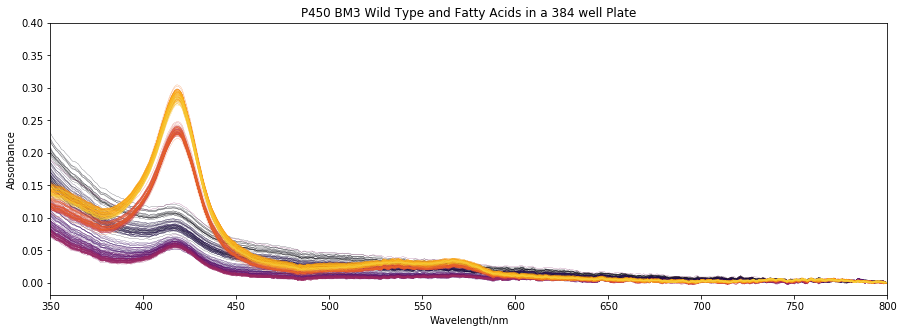

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

files =['180918_1745.csv', '180918_1747.csv', '180918_1753.csv','180918_1800.csv','180918_1810.csv','180918_1818.csv',
        '180918_1826.csv','180918_1839.csv','180918_1845.csv','180918_1854.csv','180918_1904.csv','180918_1913.csv']

#### len(files) = 12
read = 5


data = pd.read_csv(files[read],
                  skiprows =[0,1,2,3,4,5])
wells = data.loc[:,'Unnamed: 0':'Unnamed: 1']
wells = wells['Unnamed: 0'].str.cat(wells['Unnamed: 1'].astype(str))
data = data.loc[:,'Unnamed: 2':].drop('Unnamed: 584', 
                              axis = 1)

name = pd.read_csv(files[read],
                  nrows =3)['User: USER'][1]


data = data.where(data['Unnamed: 2'] != 'unused ').dropna()
data = data.rename(data['Unnamed: 2']).drop(['Unnamed: 2'],
                                    axis = 1)
data.index= wells

data = data.subtract(data['800'],
             axis = 0)

trimmed = data.loc[:,'350':'800']
trimmed.columns = trimmed.columns.values.astype(int)

fig, ax = plt.subplots(figsize=(15,5))
ax.set_prop_cycle('color',plt.cm.inferno(np.linspace(0,0.9,len(trimmed))))

for i in range(0,len(trimmed)):
    plt.plot(trimmed.iloc[i,:],
            lw = 0.2)
    
plt.title('P450 BM3 Wild Type and Fatty Acids in a 384 well Plate')    
plt.xticks(np.linspace(350,800,10))
plt.ylabel('Absorbance')
plt.xlabel('Wavelength/nm')
plt.axis(xmin = 350, xmax = 800, ymax = 0.4)
plt.show()

In [106]:
from scipy import optimize

def curve(x, vmax, km):
    y = (vmax*x)/(km + x)
    return y


def getkd(run, layout, data):
    starts = layout.index[layout['index'] ==0].tolist()
    layoutx = layout.loc[starts[run]:starts[run+1]-1]######get working range, weird indexing thing
    concsx = layoutx['0']
    wellsx = layoutx['Well']
    datax = data.loc[wellsx]
    datax = datax - datax.loc[wellsx.reset_index(drop = True)[0]]
    datax = datax.loc[:,'350':'450']
    diffdiff = datax.max(axis = 1)-datax.min(axis = 1)
    mmx = pd.concat([concsx.reset_index(drop=True),
                     diffdiff.reset_index(drop=True)], axis = 1,
                   join = 'inner')
    mmx.columns = ['substrate', 'diffdiff']
    params, cov = optimize.curve_fit(curve, mmx['substrate'], mmx['diffdiff'], p0=[1,1])
    vmax = params[0]
    km = params[1]
    return km
kds = pd.DataFrame([getkd(i,layout, data) for i in range(0,47)])
print(kds.mean())
print(kds.std())

C:\Users\MFBX3JE3\Anaconda35\lib\site-packages\scipy\optimize\minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


0    308.268116
dtype: float64
0    893.509389
dtype: float64


In [81]:
len(starts)

48

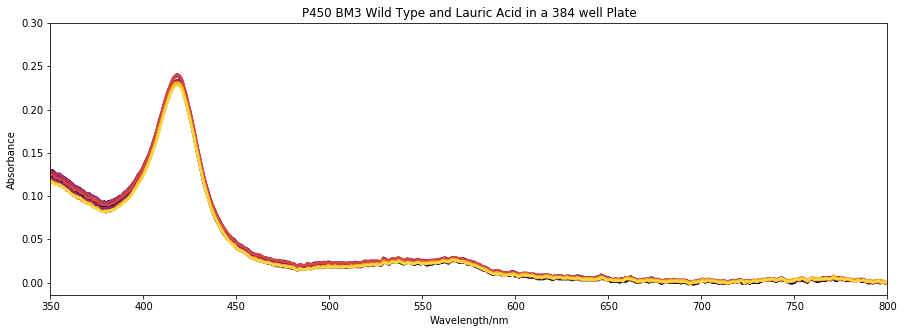

In [3]:
layout = pd.read_csv('20180919_layout.csv').drop(['Unnamed: 0'],
                                       axis = 1)

#(layout.where(layout['index'] ==0).dropna())
starts = layout.index[layout['index'] ==0].tolist()


#plt.plot(trimmed.iloc[starts[i]:starts[i+1]],
i = 30



fig, ax = plt.subplots(figsize=(15,5))
ax.set_prop_cycle('color',plt.cm.inferno(np.linspace(0,0.9,len(range(starts[i], starts[i+1])))))

for i in range(starts[i], starts[i+1]):
    plt.plot(trimmed.iloc[i,:],
            lw = 2.5)
    
plt.title('P450 BM3 Wild Type and Lauric Acid in a 384 well Plate')    
plt.xticks(trimmed.columns.values[::50])
plt.ylabel('Absorbance')
plt.xlabel('Wavelength/nm')
plt.axis(xmin = 350, xmax = 800, ymax = 0.3)
plt.show()

In [10]:
starts[31] - starts[30]

12

KeyError: 'Substrate/nl'

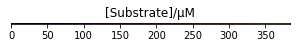

In [4]:
fig, ax = plt.subplots(figsize=(5,5))
plt.set_cmap('inferno')
plt.imshow(pd.DataFrame(np.linspace(0,0.9,len(trimmed))).transpose(),
          aspect = 1)
plt.yticks([])

#ax.set_xticklabels(labels = ['0','320','365','410','455','500'], y = [0,1,2,3,4,5])
plt.title('[Substrate]/µM')
plt.colorbar(label = '[Substrate]/µM',
            ticks = layout.loc[layout['index'] == 60]['Substrate/nl'])

plt.show()

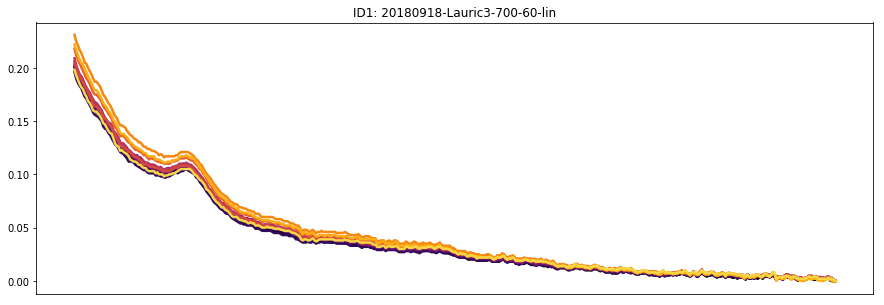

In [30]:
layout = pd.read_csv('20180919_layout.csv').drop(['Unnamed: 0'],
                                       axis = 1)

#(layout.where(layout['index'] ==0).dropna())
starts = layout.index[layout['index'] ==0].tolist()

#plt.plot(trimmed.iloc[starts[i]:starts[i+1]],
i = 1



fig, ax = plt.subplots(figsize=(15,5))
ax.set_prop_cycle('color',plt.cm.inferno(np.linspace(0,0.9,len(range(starts[i], starts[i+1])))))

for i in range(starts[i], starts[i+1]):
    plt.plot(trimmed.iloc[i,:],
            lw = 2.5)
    
plt.title(name)    
plt.xticks([0])
plt.show()

In [28]:
starts

[0,
 4,
 16,
 28,
 32,
 36,
 48,
 60,
 64,
 68,
 80,
 92,
 96,
 100,
 104,
 116,
 128,
 132,
 136,
 148,
 160,
 164,
 168,
 180,
 192,
 196,
 208,
 220,
 224,
 228,
 240,
 252,
 256,
 260,
 272,
 284,
 288,
 300,
 312,
 316,
 320,
 332,
 344,
 348,
 352,
 364,
 376,
 380]

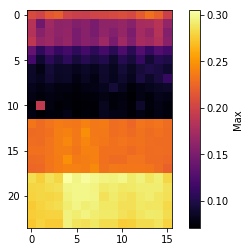

In [100]:
#trimmed.index[trimmed.max(axis = 1) > 0.25] ## get highest values
plt.set_cmap('inferno')


maparr = []
for i in trimmed.max(axis = 1):
    maparr = np.append(maparr, i)
plt.imshow(maparr.reshape(24,16))
plt.colorbar(label = 'Max')
plt.show()

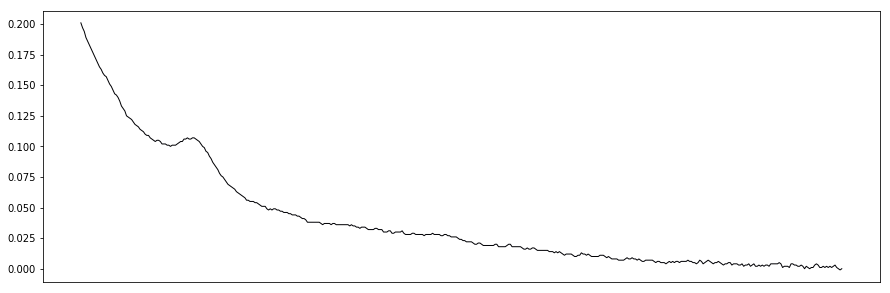

In [22]:
starts = layout.index[layout['index'] ==0].tolist()

temp = pd.DataFrame()
i = 1

for i in range(starts[i], starts[i+1]):
    temp = temp.append(trimmed.iloc[i,:])

#temp = temp.subtract(temp.iloc[0])


fig, ax = plt.subplots(figsize=(15,5))
ax.set_prop_cycle('color',plt.cm.inferno(np.linspace(0,0.9,len(range(starts[i], starts[i+1])))))



plt.plot(temp.iloc[0],lw = 1)
    
plt.xticks([])
plt.show()

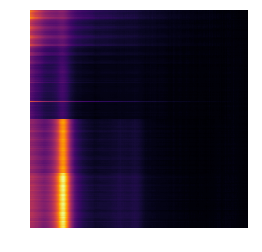

In [28]:
plt.set_cmap('inferno')
plt.imshow(trimmed, extent = (0,1,0,1))
plt.axis('off')
plt.show()